# Import Module and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
event_data = pd.read_csv('data/all_user_event_data.csv')
profile_data = pd.read_csv('data/all_user_profile_data.csv')
repo_data = pd.read_csv('data/all_user_repo_data.csv')
starred_data = pd.read_csv('data/all_user_starred_data.csv')

# Profile Data

In [3]:
profile_data.head()

,user_alias,type,hireable,location,followers,following,public_repos,public_gists,created_at,updated_at
0,usr0,User,NaN,NaN,2.0,7.0,43.0,NaN,2020-09-07T23:54:51Z,2023-10-05T18:16:01Z
1,usr1,User,NaN,Tbilisi,3.0,4.0,16.0,NaN,2011-04-16T12:30:37Z,2024-01-08T13:45:16Z
2,usr2,User,NaN,Karachi,13.0,23.0,44.0,NaN,2023-01-03T13:56:42Z,2023-12-24T05:10:36Z
3,usr3,User,True,Karachi,NaN,NaN,5.0,NaN,2021-09-24T09:04:40Z,2023-05-02T19:11:00Z
4,usr4,User,NaN,NaN,1.0,NaN,2.0,NaN,2022-10-07T11:01:08Z,2023-12-07T20:03:36Z


In [4]:
profile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8583 entries, 0 to 8582
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_alias    8583 non-null   object 
 1   type          8583 non-null   object 
 2   hireable      1731 non-null   object 
 3   location      4667 non-null   object 
 4   followers     6053 non-null   float64
 5   following     5913 non-null   float64
 6   public_repos  8468 non-null   float64
 7   public_gists  1224 non-null   float64
 8   created_at    8583 non-null   object 
 9   updated_at    8583 non-null   object 
dtypes: float64(4), object(6)
memory usage: 670.7+ KB


In [5]:
profile_data.describe()

,followers,following,public_repos,public_gists
count,6053.000000,5913.000000,8468.000000,1224.000000
mean,23.588469,22.914257,23.285191,9.337418
std,258.815656,226.813140,43.595825,31.173369
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,7.000000,1.000000
50%,4.000000,5.000000,14.000000,3.000000
75%,12.000000,15.000000,27.000000,7.000000
max,14753.000000,15337.000000,2496.000000,760.000000


In [6]:
profile_data['followers'].fillna(0, inplace=True)
profile_data['following'].fillna(0, inplace=True)
profile_data['public_repos'].fillna(0, inplace=True)
profile_data['public_gists'].fillna(0, inplace=True)
profile_data['hireable'].fillna(False, inplace=True)

In [7]:
profile_data.isnull().sum()

user_alias         0
type               0
hireable           0
location        3916
followers          0
following          0
public_repos       0
public_gists       0
created_at         0
updated_at         0
dtype: int64

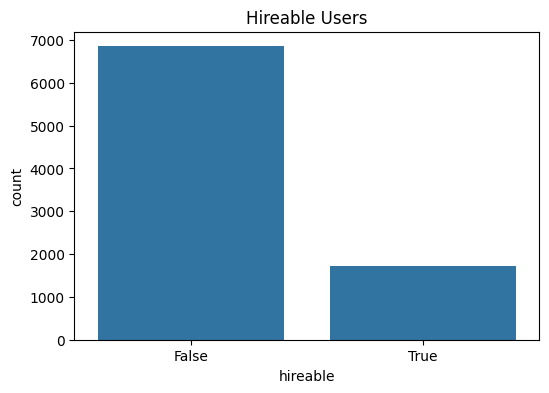

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=profile_data, x='hireable')
plt.title('Hireable Users')
plt.show()

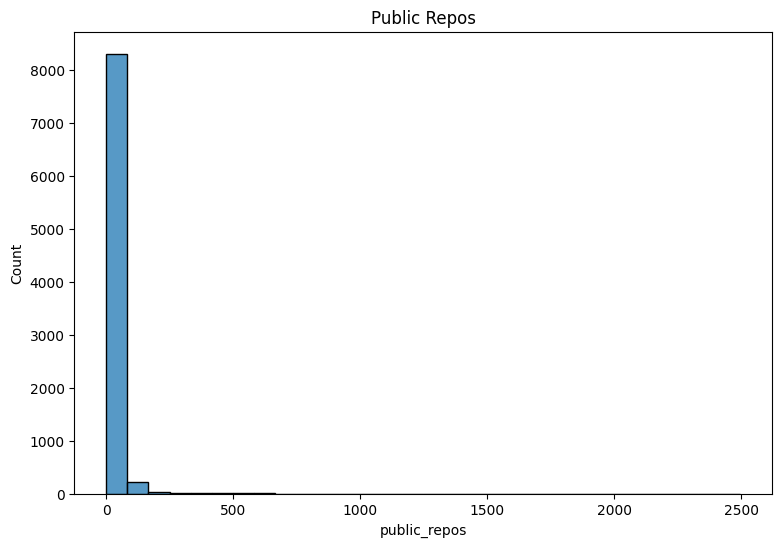

In [9]:
plt.figure(figsize=(9, 6))
sns.histplot(data=profile_data, x='public_repos', bins=30)
plt.title('Public Repos')
plt.show()

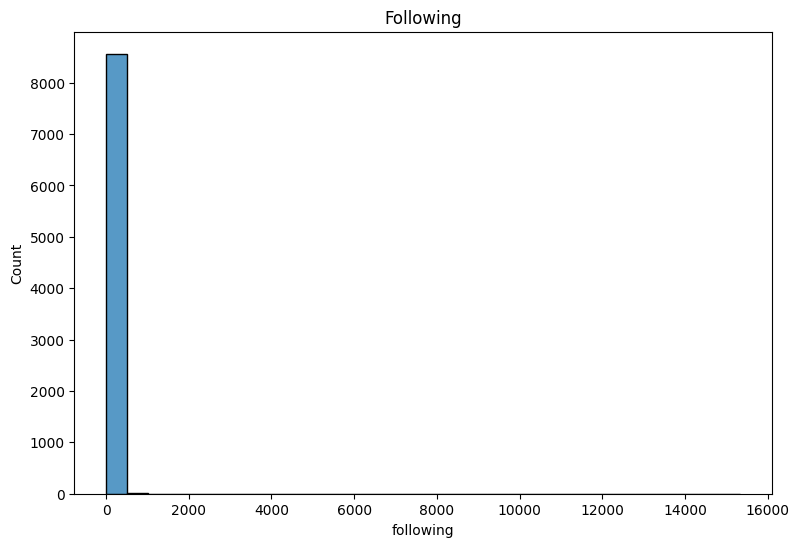

In [10]:
plt.figure(figsize=(9, 6))
sns.histplot(data=profile_data, x='following', bins=30)
plt.title('Following')
plt.show()

In [11]:
log_followers = np.log(profile_data['followers'] + 1)

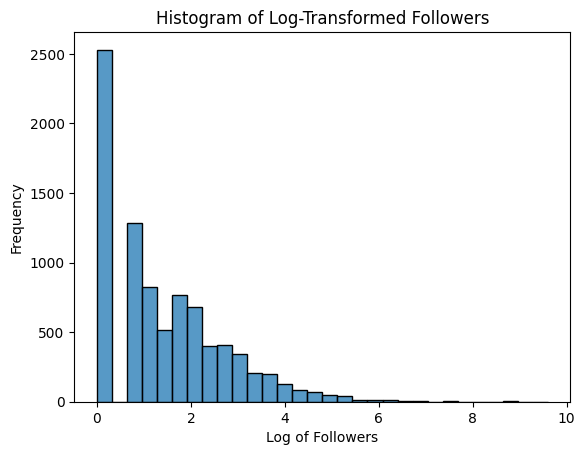

In [12]:
sns.histplot(log_followers, bins=30)

plt.xlabel('Log of Followers')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Followers')

plt.show()

From the histogram of the log-transformed followers, it appears that a significant number of users have between 0 and 2 log of followers. Therefore, for further data analysis I set a threshold at around 4 to focus on users with a higher follower count while retaining a substantial portion of dataset.

In [13]:
threshold = np.exp(4)

In [14]:
threshold

54.598150033144236

In [15]:
high_follower_users = profile_data[profile_data['followers'] > threshold]
low_follower_users = profile_data[profile_data['followers'] <= threshold]

In [16]:
len(profile_data)

8583

In [17]:
len(high_follower_users), len(low_follower_users)

(342, 8241)

# Event Data

In [18]:
event_data.head()

,user_alias,event_type,created_at
0,usr1,PushEvent,2023-10-31T17:57:39Z
1,usr1,CreateEvent,2023-10-30T18:13:26Z
2,usr1,CreateEvent,2023-10-30T17:53:32Z
3,usr2,CreateEvent,2024-01-08T17:29:08Z
4,usr2,CreateEvent,2024-01-08T17:27:38Z


In [19]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185141 entries, 0 to 185140
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_alias  185141 non-null  object
 1   event_type  183512 non-null  object
 2   created_at  183512 non-null  object
dtypes: object(3)
memory usage: 4.2+ MB


In [20]:
event_data.describe()

,user_alias,event_type,created_at
count,185141,183512,183512
unique,5844,16,176733
top,usr250,PushEvent,2023-12-11T18:25:02Z
freq,300,105266,11


In [21]:
event_data.isnull().sum()

user_alias       0
event_type    1629
created_at    1629
dtype: int64

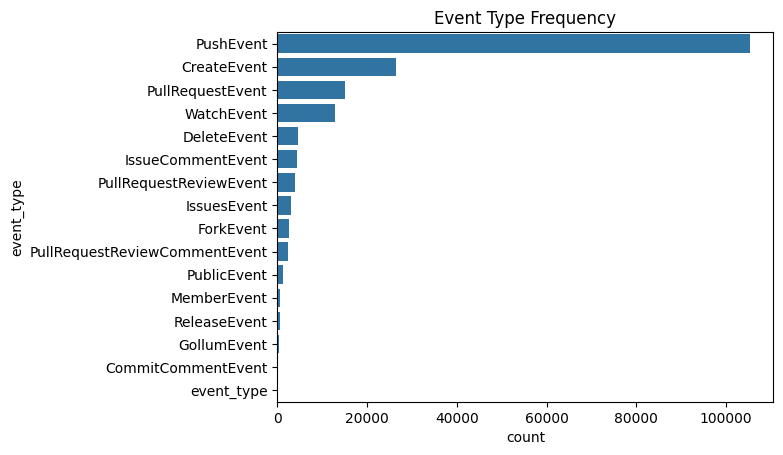

In [22]:
order = event_data['event_type'].value_counts().index
sns.countplot(data=event_data, y='event_type', order=order)
plt.title('Event Type Frequency')
plt.show()

# Repo Data

In [23]:
repo_data.head()

,user_alias,description,fork,stargazers_count,language,topics,forks
0,usr0,NaN,NaN,NaN,JavaScript,NaN,NaN
1,usr0,NaN,NaN,NaN,JavaScript,NaN,NaN
2,usr0,NaN,NaN,NaN,JavaScript,NaN,NaN
3,usr0,NaN,NaN,NaN,JavaScript,NaN,NaN
4,usr0,NaN,NaN,NaN,JavaScript,NaN,NaN


In [24]:
repo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181609 entries, 0 to 181608
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_alias        181609 non-null  object 
 1   description       95716 non-null   object 
 2   fork              41311 non-null   object 
 3   stargazers_count  30333 non-null   float64
 4   language          138836 non-null  object 
 5   topics            12929 non-null   object 
 6   forks             9486 non-null    float64
dtypes: float64(2), object(5)
memory usage: 9.7+ MB


In [25]:
repo_data.describe()

,stargazers_count,forks
count,30333.000000,9486.000000
mean,9.454225,9.393844
std,242.336619,114.511456
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,34729.000000,6472.000000


In [26]:
repo_data.isnull().sum()

user_alias               0
description          85893
fork                140298
stargazers_count    151276
language             42773
topics              168680
forks               172123
dtype: int64

In [27]:
language_counts = repo_data['language'].value_counts()

In [28]:
top_20_languages = language_counts[:20]

repo_data['language_top20'] = repo_data['language'].where(repo_data['language'].isin(top_20_languages.index), 'Other')

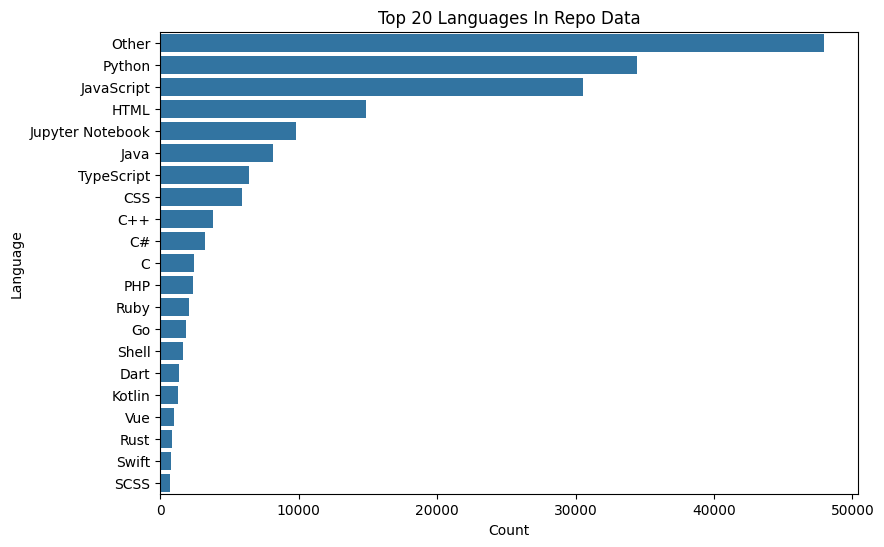

In [29]:
plt.figure(figsize=(9, 6))
sns.countplot(data=repo_data, y='language_top20', order=repo_data['language_top20'].value_counts().index)
plt.title('Top 20 Languages In Repo Data')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

# Starred Data

In [30]:
starred_data.head()

,user_alias,full_name,html_url,description,language,topics,stargazers_count
0,usr1,microsoft/PowerToys,https://github.com/microsoft/PowerToys,Windows system utilities to maximize productivity,C#,color-picker/desktop/fancyzones/keyboard-manag...,101541.0
1,usr1,spring-projects/spring-security,https://github.com/spring-projects/spring-secu...,Spring Security,Java,framework/java/security/spring/spring-framework,8207.0
2,usr1,bitwarden/clients,https://github.com/bitwarden/clients,Bitwarden client applications (web/browser ext...,TypeScript,angular/bitwarden/browser-extension/chrome/cli...,7824.0
3,usr1,gothinkster/realworld,https://github.com/gothinkster/realworld,"""The mother of all demo apps"" — Exemplary full...",TypeScript,NaN,77396.0
4,usr1,ch4mpy/spring-addons,https://github.com/ch4mpy/spring-addons,Ease spring OAuth2 resource-servers configurat...,Java,auth0/cognito/hacktoberfest/keycloak/oidc/open...,405.0


In [31]:
starred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118764 entries, 0 to 118763
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_alias        118764 non-null  object 
 1   full_name         118764 non-null  object 
 2   html_url          118764 non-null  object 
 3   description       105881 non-null  object 
 4   language          105256 non-null  object 
 5   topics            72093 non-null   object 
 6   stargazers_count  118756 non-null  float64
dtypes: float64(1), object(6)
memory usage: 6.3+ MB


In [32]:
starred_data.describe()

,stargazers_count
count,118756.000000
mean,17709.895609
std,44375.232528
min,1.000000
25%,26.000000
50%,1411.000000
75%,13295.000000
max,381613.000000


In [33]:
starred_data.isnull().sum()

user_alias              0
full_name               0
html_url                0
description         12883
language            13508
topics              46671
stargazers_count        8
dtype: int64

In [34]:
language_counts = starred_data['language'].value_counts()

In [35]:
top_20_languages = language_counts[:20]

starred_data['language_top20'] = starred_data['language'].where(starred_data['language'].isin(top_20_languages.index), 'Other')

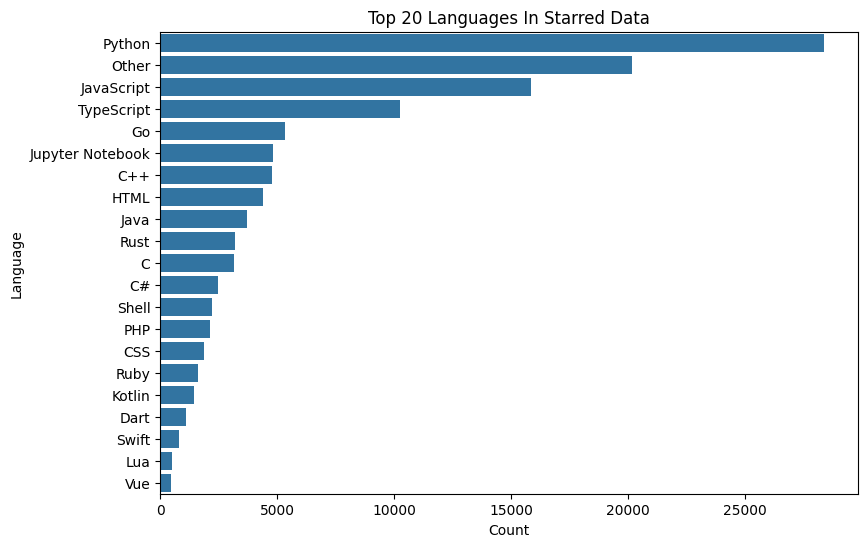

In [36]:
plt.figure(figsize=(9, 6))
sns.countplot(data=starred_data, y='language_top20', order=starred_data['language_top20'].value_counts().index)
plt.title('Top 20 Languages In Starred Data')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()